<h1>Activity 2: UK ROAD ACCIDENT</h1>
<hr/>
<h3>Analyst: Marianne Capuno</h3>

<h1>Import Libraries</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import folium
from folium.plugins import HeatMap
from IPython.display import IFrame
import warnings
warnings.filterwarnings('ignore')

<h1>Convert the DataSet into DataFrame</h1>

In [2]:
accident = pd.read_csv("datasets//uk_road_accident.csv")
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>Checking for Null Values</h1>

In [3]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h1>Descriptive Analytics</h1>

In [4]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


<h1>Check DataFrame Info</h1>

In [5]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

<h1>Filling Up The Null Values And Changing DataTypes</h1>

In [6]:
# ✅ Clean Accident Date column and create date parts
s = accident["Accident Date"].astype(str).str.strip().replace(r"/", "-", regex=True)
accident["Accident Date"] = pd.to_datetime(s, dayfirst=True, errors="coerce")

# Create derived columns
accident["year"] = accident["Accident Date"].dt.year
accident["month"] = accident["Accident Date"].dt.month
accident["day"] = accident["Accident Date"].dt.day
accident["dayofweek"] = accident["Accident Date"].dt.dayofweek   # 0 = Mon ... 6 = Sun
accident["day_name"] = accident["Accident Date"].dt.day_name()

# Save cleaned version for later reuse (optional)
accident.to_csv("uk_road_accident_clean_dates.csv", index=False)
print("✅ Accident Date cleaned and new columns created")

categorical_cols = [
    "Accident_Severity",
    "Light_Conditions",
    "District Area",
    "Road_Surface_Conditions",
    "Road_Type",
    "Urban_or_Rural_Area",
    "Weather_Conditions",
    "Vehicle_Type"
]

for col in categorical_cols:
    accident[col] = accident[col].astype("category")

✅ Accident Date cleaned and new columns created


In [7]:
accident["Latitude"].fillna(accident["Latitude"].mean(), inplace=True)
accident["Longitude"].fillna(accident["Longitude"].mean(), inplace=True)
accident["Road_Surface_Conditions"].fillna(accident["Road_Surface_Conditions"].mode()[0], inplace=True)
accident["Road_Type"].fillna(accident["Road_Type"].mode()[0], inplace=True)
accident["Urban_or_Rural_Area"].fillna(accident["Urban_or_Rural_Area"].mode()[0], inplace=True)
accident["Weather_Conditions"].fillna(accident["Weather_Conditions"].mode()[0], inplace=True)
mode_date = accident["Accident Date"].mode()[0]
accident["Accident Date"].fillna(mode_date, inplace=True)

In [8]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
year                       0
month                      0
day                        0
dayofweek                  0
day_name                   0
dtype: int64

<h1>Exploratory Data Analytics</h1>

In [9]:
accident.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type', 'year', 'month', 'day', 'dayofweek', 'day_name'],
      dtype='object')

<h1>Question 1</h1>
<hr>
<h3>Does the longitude has corr. in the severity of an accident?</h3>

In [10]:
accident['Accident_Severity']

0         Serious
1         Serious
2         Serious
3         Serious
4          Slight
           ...   
660674     Slight
660675     Slight
660676     Slight
660677    Serious
660678    Serious
Name: Accident_Severity, Length: 660679, dtype: category
Categories (3, object): ['Fatal', 'Serious', 'Slight']

In [11]:
accident[accident['Accident_Severity']== 'Serious']['Longitude']

0        -0.209082
1        -0.173647
2        -0.210215
3        -0.202731
5        -0.192556
            ...   
660629   -4.176860
660645   -1.165232
660672   -3.852421
660677   -3.823997
660678   -3.895673
Name: Longitude, Length: 88217, dtype: float64

In [12]:
accident[accident['Accident_Severity']== 'Slight']['Longitude']

4        -0.192487
8        -0.173572
9        -0.175651
13       -0.210701
14       -0.167129
            ...   
660671   -3.930799
660673   -3.748312
660674   -3.467828
660675   -3.809281
660676   -3.862727
Name: Longitude, Length: 563801, dtype: float64

In [13]:
accident[accident['Accident_Severity']== 'Fatal']['Longitude']

7        -0.179486
11       -0.159652
20       -0.214277
21       -0.170375
717      -0.107581
            ...   
660470   -6.278583
660519   -4.451628
660565   -4.243081
660581   -3.065535
660627   -1.409761
Name: Longitude, Length: 8661, dtype: float64

In [14]:
axi, long = f_oneway(accident[accident['Accident_Severity']== 'Fatal']['Longitude'], accident[accident['Accident_Severity']== 'Slight']['Longitude'], accident[accident['Accident_Severity']== 'Serious']['Longitude'])
long

np.float64(5.6694282604018206e-14)

<h1>Insight:</h1>
<h3>There are a positive correlation(5.669) between the accident severity and the longitude, this means that the position of the longitude affects the severity of an accident.</h3>
<hr>

<h1>Question 2</h1>
<hr>
<h3>What district has the highest accurrence of accidents?</h3>

In [15]:
accident['District Area'].value_counts().head(1)

District Area
Birmingham    13491
Name: count, dtype: int64

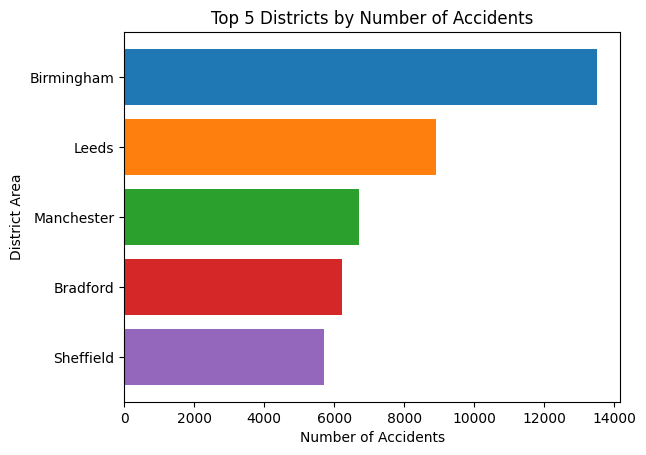

In [16]:
accident['District Area'] = accident['District Area'].str.strip()

top5 = (
    accident['District Area']
    .value_counts()
    .nlargest(5)
    .reset_index()
)
top5.columns = ['District Area', 'Accident Count']

plt.barh(top5['District Area'], top5['Accident Count'], 
        color = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"])
plt.title("Top 5 Districts by Number of Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("District Area")
plt.gca().invert_yaxis()
plt.show()

<h1>Insight:</h1>
<h3>The District Area of Birmingham recorded 13,491 accidents, the highest among all districts. This highlights Birmingham as a high-risk area, likely due to its dense population, high vehicle usage, and complex traffic networks compared to smaller districts.</h3>
<hr>

<h1>Question 3</h1>
<hr>
<h3>Which accident severity happens most often?</h3>

In [17]:
accident['Accident_Severity'].value_counts().head(1)

Accident_Severity
Slight    563801
Name: count, dtype: int64

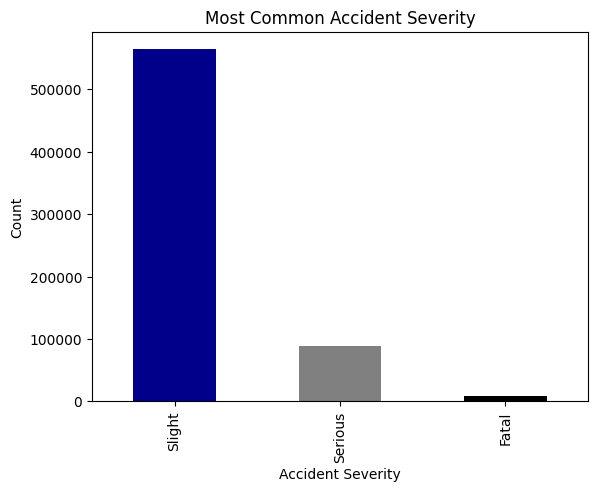

In [18]:
top1 = accident['Accident_Severity'].value_counts()

top1.plot(kind='bar', color=["darkblue", "gray", "black"])
plt.title("Most Common Accident Severity")
plt.ylabel("Count")
plt.xlabel("Accident Severity")
plt.show()

<h1>Insight:</h1>
<h3>The majority of recorded accidents fall under the 'Slight' accident severity, with 563,801 cases. This indicates that while accidents are frequent, most do not result in severe or fatal outcomes, suggesting that many incidents involve minor injuries or low-impact collisions</h3>
<hr>

<h1>Question 4</h1>
<hr>
<h3>Do accident severities change depending on the weather conditions?</h3>

In [19]:
severity = accident.groupby(['Weather_Conditions', 'Accident_Severity']).size().unstack(fill_value=0)
severity

Accident_Severity,Fatal,Serious,Slight
Weather_Conditions,,,
Fine + high winds,175,1245,7134
Fine no high winds,7207,73285,454521
Fog or mist,82,483,2963
Other,165,1801,15184
Raining + high winds,145,1261,8209
Raining no high winds,848,9468,69380
Snowing + high winds,3,109,773
Snowing no high winds,36,565,5637


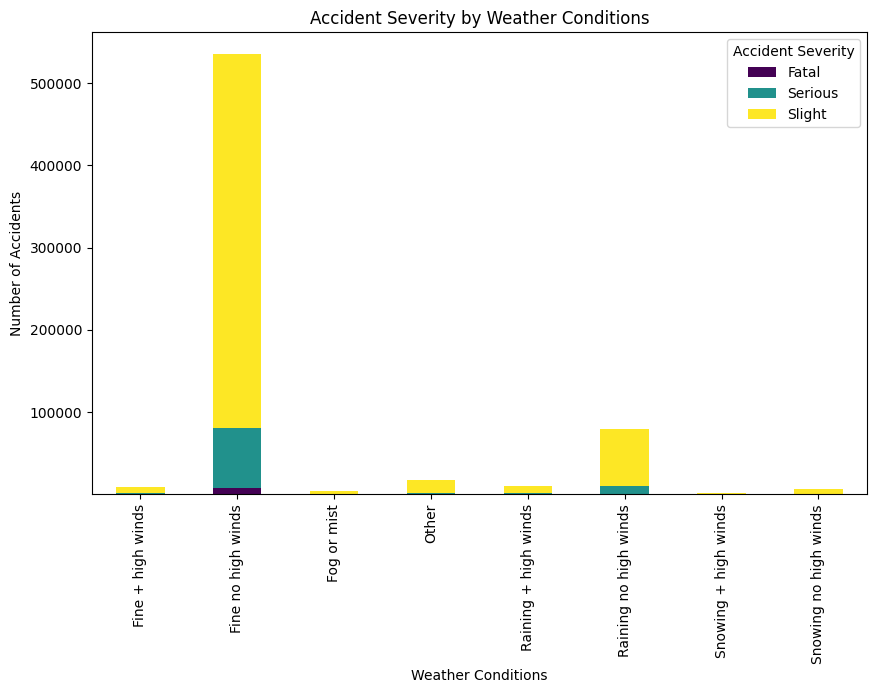

In [20]:
severity.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")

plt.title("Accident Severity by Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plt.legend(title="Accident Severity")
plt.show()

<h1>Insight:</h1>
<h3>Accidents are most frequent in fine weather due to higher traffic, but adverse conditions like rain, fog, and snow show a higher proportion of serious and fatal cases.

<h1>Question 5</h1>
<hr>
<h3>Are accidents more common in urban or rural areas?</h3>

In [21]:
accident['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

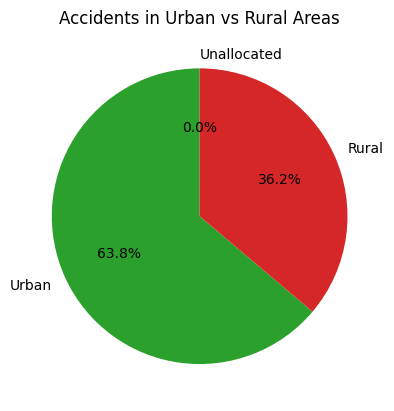

In [22]:
accident['Urban_or_Rural_Area'].value_counts().plot(
    kind="pie", autopct="%1.1f%%", startangle=90,
    colors=["#2ca02c", "#d62728"]
)

plt.title("Accidents in Urban vs Rural Areas")
plt.ylabel("")
plt.show()

<h1>Insight:</h1>
<h3>Urban areas record more accidents due to higher traffic density, but rural accidents may carry higher risks of severity.</h3>
<hr>

<h1>Question 6</h1>
<hr>
<h3>Which vehicle type has the most casulties?</h3>

In [23]:
vehicle = accident.groupby('Vehicle_Type')['Number_of_Casualties'].sum()
vehicle

Vehicle_Type
Agricultural vehicle                       2613
Bus or coach (17 or more pass seats)      34915
Car                                      676692
Data missing or out of range                  9
Goods 7.5 tonnes mgw and over             23397
Goods over 3.5t. and under 7.5t            8308
Minibus (8 - 16 passenger seats)           2659
Motorcycle 125cc and under                20348
Motorcycle 50cc and under                 10167
Motorcycle over 125cc and up to 500cc     10286
Motorcycle over 500cc                     34879
Other vehicle                              7554
Pedal cycle                                 270
Ridden horse                                  5
Taxi/Private hire car                     18195
Van / Goods 3.5 tonnes mgw or under       46271
Name: Number_of_Casualties, dtype: int64

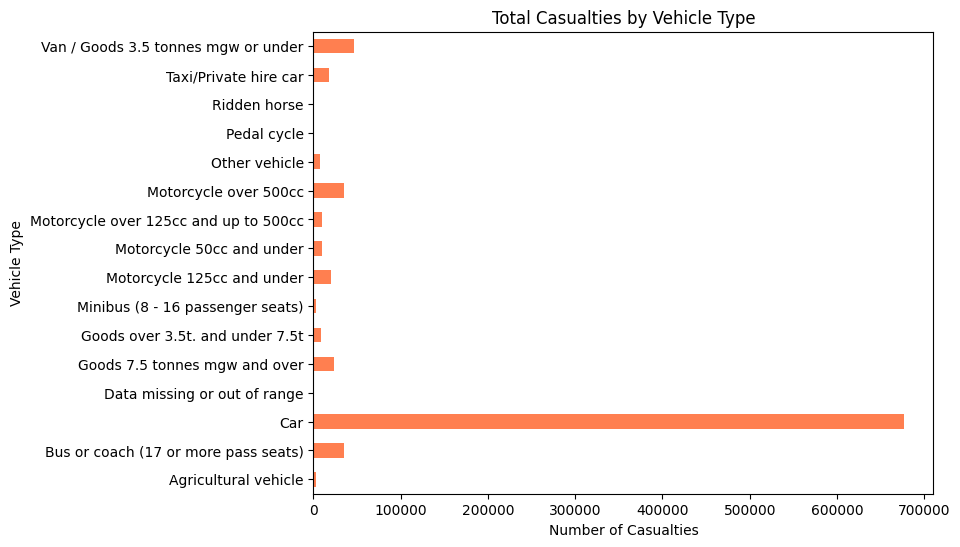

In [24]:
vehicle.plot(kind="barh", color="coral", figsize=(8,6))

plt.title("Total Casualties by Vehicle Type")
plt.xlabel("Number of Casualties")
plt.ylabel("Vehicle Type")
plt.show()

<h1>Insight:</h1>
<h3>Cars account for the highest number of casualties, reflecting their heavy presence on roads. Motorcycles, while fewer in number, remain highly vulnerable. Goods vehicles and buses also contribute significantly, while rare cases like agricultural vehicles and horses show that accidents involve a wide range of road users.</h3>
<hr>

<h1>Question 7</h1>
<hr>
<h3>Does the number of vehicles have to do with the number of casualties?</h3>

In [25]:
accident['Number_of_Casualties'].corr(accident['Number_of_Vehicles'])

np.float64(0.22888886126927627)

<h1>Insight:</h1>
<h3>There is a positive correlation (0.229) between the number of vehicles involved in an accident and the number of casualties. This indicates that accidents involving more vehicles tend to result in more casualties.</h3>
<hr>

<h1>Question 8</h1>
<hr>
<h3>Do light conditions affect accident severity?</h3>

In [26]:
con = accident.groupby(['Light_Conditions', 'Accident_Severity']).size().unstack(fill_value=0)
con

Accident_Severity,Fatal,Serious,Slight
Light_Conditions,,,
Darkness - lighting unknown,68,794,5622
Darkness - lights lit,1860,19130,108345
Darkness - lights unlit,45,360,2138
Darkness - no lighting,1612,7174,28651
Daylight,5076,60759,419045


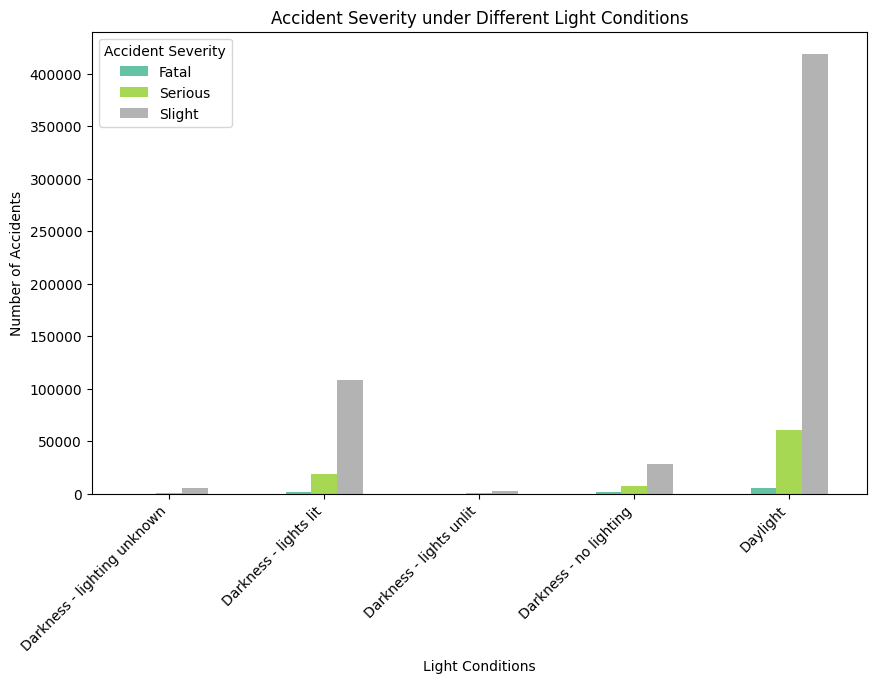

In [27]:
con.plot(kind="bar", figsize=(10,6), colormap="Set2")

plt.title("Accident Severity under Different Light Conditions")
plt.xlabel("Light Conditions")
plt.ylabel("Number of Accidents")
plt.legend(title="Accident Severity")
plt.xticks(rotation=45, ha="right")
plt.show()

<h1>Insight:</h1>
<h3>Accidents are most frequent in daylight, but dark conditions, particularly without lighting, lead to a higher likelihood of serious and fatal outcomes..</h3>
<hr>

<h1>Question 9</h1>
<hr>
<h3>Does road surface affects the severity of an accident?</h3>

In [28]:
surface = accident.groupby(['Road_Surface_Conditions', 'Accident_Severity']).size().unstack(fill_value=0)
surface

Accident_Severity,Fatal,Serious,Slight
Road_Surface_Conditions,,,
Dry,5790,61708,381049
Flood over 3cm. deep,23,152,842
Frost or ice,193,2007,16317
Snow,35,565,5290
Wet or damp,2620,23785,160303


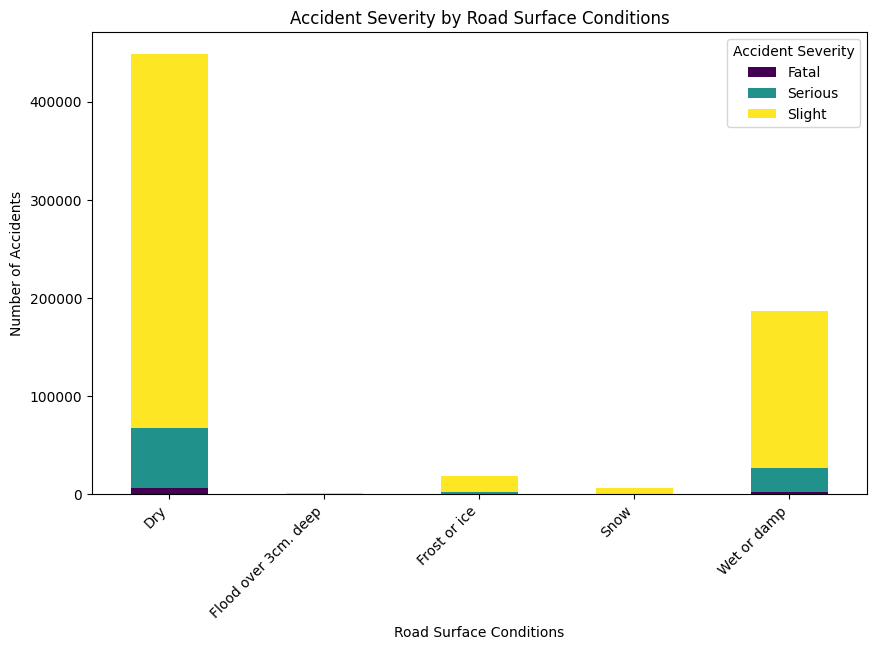

In [29]:
surface.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")

plt.title("Accident Severity by Road Surface Conditions")
plt.xlabel("Road Surface Conditions")
plt.ylabel("Number of Accidents")
plt.legend(title="Accident Severity")
plt.xticks(rotation=45, ha="right")
plt.show()

<h1>Insight:</h1>
<h3>The road surface has an affect to the severity of an accident. Most accidents occur on dry roads, but wet, icy, or snowy conditions increase the likelihood of serious and fatal outcomes.</h3>
<hr>

<h1>Question 10</h1>
<hr>
<h3>Which road type has higher accurence of an accident?</h3>

In [30]:
accident['Road_Type'].value_counts().head(5)

Road_Type
Single carriageway    496663
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

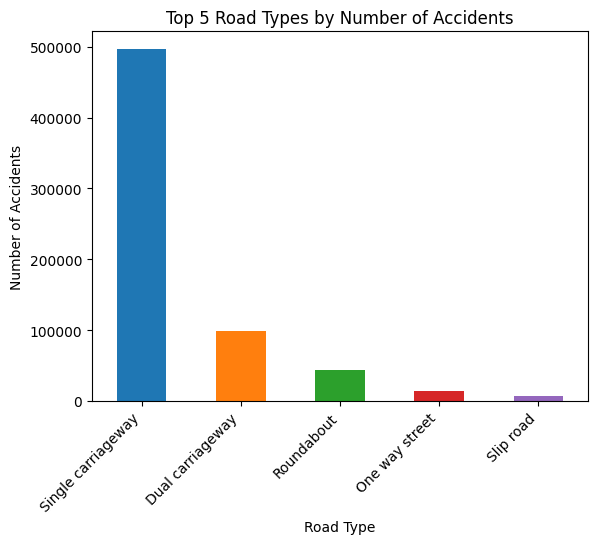

In [31]:
top5_road = accident['Road_Type'].value_counts().head(5)

top5_road.plot(kind="bar", color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"])

plt.title("Top 5 Road Types by Number of Accidents")
plt.xlabel("Road Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.show()

<h1>Insight:</h1>
<h3>Single carriageway roads have the highest accident counts, likely because of heavier traffic and shared lanes, while dual carriageways and roundabouts report fewer incidents.</h3>
<hr>

<h1>Question 11</h1>
<hr>
<h3>Is City of London consistently shows higher accident severity regardless of conditions?</h3>

In [32]:
check_conditions = accident.groupby(['District Area', 'Accident_Severity', 'Weather_Conditions']).size().unstack(fill_value=0)
city_london_conditions = check_conditions.loc['City of London']
city_london_conditions

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds
Accident_Severity,,,,,,,,
Fatal,0,6,0,0,0,1,0,0
Serious,1,155,0,1,0,17,0,0
Slight,7,1017,0,11,7,92,0,2


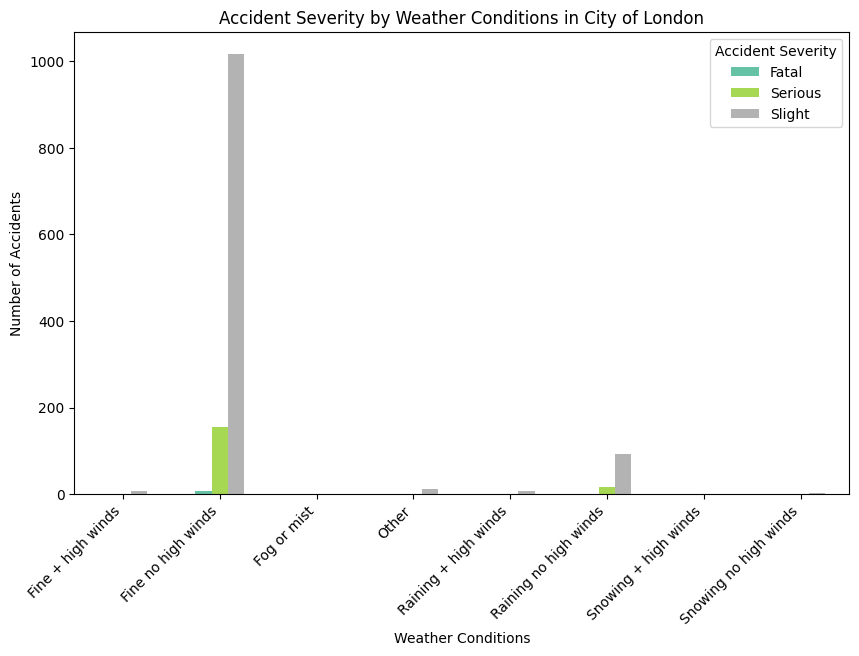

In [33]:
city_london_conditions.T.plot(kind="bar", figsize=(10,6), colormap="Set2")

plt.title("Accident Severity by Weather Conditions in City of London")
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plt.legend(title="Accident Severity")
plt.xticks(rotation=45, ha="right")
plt.show()


<h1>Insight:</h1>
<h3>The City of London experiences accidents almost all weather conditions, with serious and fatal incidents most frequent in fine weather, suggesting that high-severity accidents are not limited to adverse conditions</h3>
<hr>

<h1>Question 12</h1>
<hr>
<h3>Does the type of road influence the likelihood of fatal accidents?</h3>

In [34]:
road_vs_severity = (accident.groupby('Road_Type')['Accident_Severity'].value_counts(normalize=True))
road_vs_severity

Road_Type           Accident_Severity
Dual carriageway    Slight               0.863604
                    Serious              0.118140
                    Fatal                0.018255
One way street      Slight               0.870934
                    Serious              0.122059
                    Fatal                0.007006
Roundabout          Slight               0.913462
                    Serious              0.083311
                    Fatal                0.003228
Single carriageway  Slight               0.844764
                    Serious              0.142028
                    Fatal                0.013208
Slip road           Slight               0.906263
                    Serious              0.086777
                    Fatal                0.006959
Name: proportion, dtype: float64

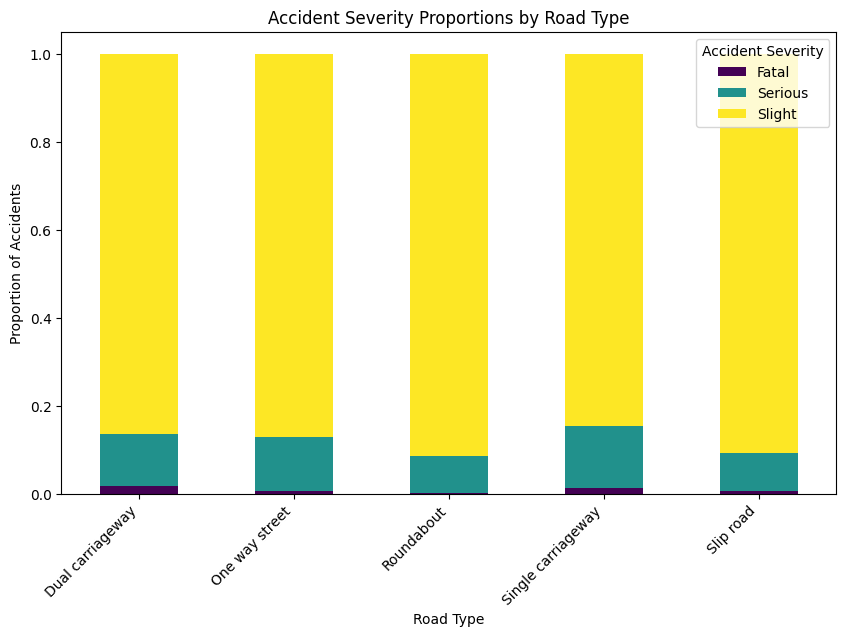

In [35]:
road_vs_severity = road_vs_severity.unstack(fill_value=0)

road_vs_severity.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")

plt.title("Accident Severity Proportions by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Proportion of Accidents")
plt.legend(title="Accident Severity")
plt.xticks(rotation=45, ha="right")
plt.show()

<h1>Insight:</h1>
<h3>The type of road influences accident severity, but the likelihood of fatalities is generally low across all road types. Most accidents are slight, with roundabouts (91.3% slight) and slip roads (90.6% slight) having the highest proportion of minor incidents. Fatal accidents are rare, with proportions below 2% for all road types, indicating that while road design affects accident outcomes, severe accidents remain relatively uncommon.</h3>
<hr>

<h1>Question 13</h1>
<hr>
<h3>Does latitude has an effect on weather conditions?</h3>

In [36]:
accident['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       535013
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

In [37]:
accident[accident['Weather_Conditions']== 'Fine no high winds']['Latitude']

0         51.506187
2         51.517715
3         51.495478
4         51.488576
5         51.497750
            ...    
660673    57.585152
660674    57.374005
660675    57.232273
660676    57.585044
660677    57.214898
Name: Latitude, Length: 535013, dtype: float64

In [38]:
accident[accident['Weather_Conditions']== 'Raining no high winds']['Latitude']

1         51.495029
18        51.497590
24        51.498157
27        51.490526
28        51.513352
            ...    
660622    59.067516
660636    60.368948
660644    60.254095
660646    60.148990
660663    56.865367
Name: Latitude, Length: 79696, dtype: float64

In [39]:
accident[accident['Weather_Conditions']== 'Other']['Latitude']

13        51.508999
25        51.493311
34        51.498244
95        51.480177
118       51.519685
            ...    
660664    56.880265
660667    57.076929
660668    57.054889
660669    57.484296
660671    57.572162
Name: Latitude, Length: 17150, dtype: float64

In [40]:
accident[accident['Weather_Conditions']== 'Raining + high winds']['Latitude']

41        51.493753
694       51.509123
697       51.513119
1017      51.520805
1165      51.509345
            ...    
660605    58.989752
660632    60.242707
660640    60.153353
660642    60.157212
660643    60.344563
Name: Latitude, Length: 9615, dtype: float64

In [41]:
accident[accident['Weather_Conditions']== 'Fine + high winds']['Latitude']

36        51.497451
287       51.494612
322       51.488769
391       51.495117
414       51.487743
            ...    
660629    57.687933
660637    60.233118
660645    60.162660
660647    60.195539
660665    56.884448
Name: Latitude, Length: 8554, dtype: float64

In [42]:
accident[accident['Weather_Conditions']== 'Snowing no high winds']['Latitude']

57        51.497725
85        51.522561
88        51.482076
142       51.488394
1039      51.497214
            ...    
660631    60.201045
660654    60.070562
660655    60.239368
660659    57.248688
660678    57.575210
Name: Latitude, Length: 6238, dtype: float64

In [43]:
accident[accident['Weather_Conditions']== 'Fog or mist']['Latitude']

2169      51.505773
3454      51.524253
4192      51.493602
4986      51.530953
5789      51.511646
            ...    
660188    51.870180
660285    52.142690
660367    52.134766
660409    57.515596
660550    58.307893
Name: Latitude, Length: 3528, dtype: float64

In [44]:
accident[accident['Weather_Conditions']== 'Snowing + high winds']['Latitude']

23307     54.753063
23316     54.470140
23585     54.769737
23641     54.766547
24832     54.784285
            ...    
660601    58.895122
660650    60.250124
660653    60.305886
660656    60.094818
660666    56.879446
Name: Latitude, Length: 885, dtype: float64

In [45]:
lat, la_wea = f_oneway(accident[accident['Weather_Conditions']== 'Snowing + high winds']['Latitude'], 
                       accident[accident['Weather_Conditions']== 'Fog or mist']['Latitude'], 
                       accident[accident['Weather_Conditions']== 'Snowing no high winds']['Latitude'], 
                       accident[accident['Weather_Conditions']== 'Fine + high winds']['Latitude'], 
                       accident[accident['Weather_Conditions']== 'Raining + high winds']['Latitude'], 
                       accident[accident['Weather_Conditions']== 'Other']['Latitude'], 
                       accident[accident['Weather_Conditions']== 'Raining no high winds']['Latitude'], 
                       accident[accident['Weather_Conditions']== 'Fine no high winds']['Latitude'])
la_wea

np.float64(0.0)

<h1>Insight:</h1>
<h3>The correlation between latitude and weather conditions is 0, indicating no linear relationship. This suggests that the location’s latitude does not predict or influence the weather conditions recorded in the dataset.</h3>
<hr>

<h1>Question 14</h1>
<hr>
<h3>When did most accidents happened?</h3>

In [46]:
accident['Accident Date'].value_counts().head(5)

Accident Date
2019-11-30    704
2019-01-31    697
2021-11-13    692
2019-07-13    692
2019-08-14    688
Name: count, dtype: int64

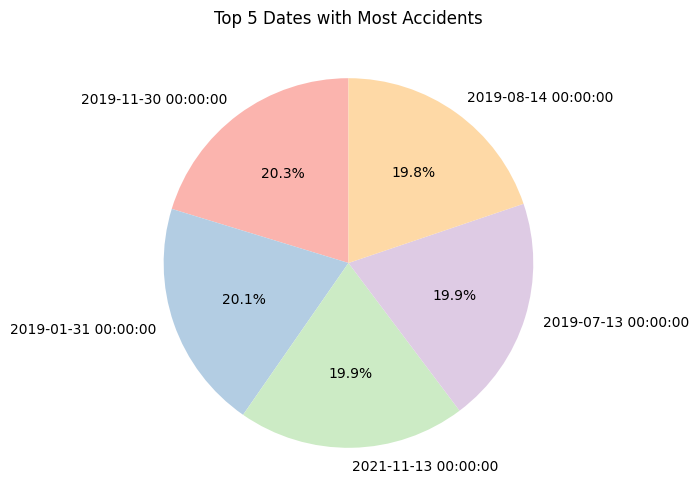

In [47]:
top5_dates = accident['Accident Date'].value_counts().head(5)
top5_dates.plot(kind="pie", autopct="%1.1f%%", startangle=90,
                colors=plt.cm.Pastel1.colors, figsize=(6,6))

plt.title("Top 5 Dates with Most Accidents")
plt.ylabel("")
plt.show()

<h1>Insight:</h1>
<h3>Among the recorded dates, the highest number of accidents occurred on November 30, 2019, with 704 incidents. This indicates that certain specific days may experience unusually high accident counts, possibly due to traffic volume, weather, or other situational factors.</h3>
<hr>

<h1>Question 15</h1>
<hr>
<h3>Does the combination of vehicle type and road type affects the number of casualties?</h3>

In [48]:
combined = accident.groupby(['Vehicle_Type', 'Road_Type'])['Number_of_Casualties'].sum()
combined

Vehicle_Type                         Road_Type         
Agricultural vehicle                 Dual carriageway        406
                                     One way street           60
                                     Roundabout              156
                                     Single carriageway     1949
                                     Slip road                42
                                                           ...  
Van / Goods 3.5 tonnes mgw or under  Dual carriageway       7494
                                     One way street          886
                                     Roundabout             2927
                                     Single carriageway    34427
                                     Slip road               537
Name: Number_of_Casualties, Length: 80, dtype: int64

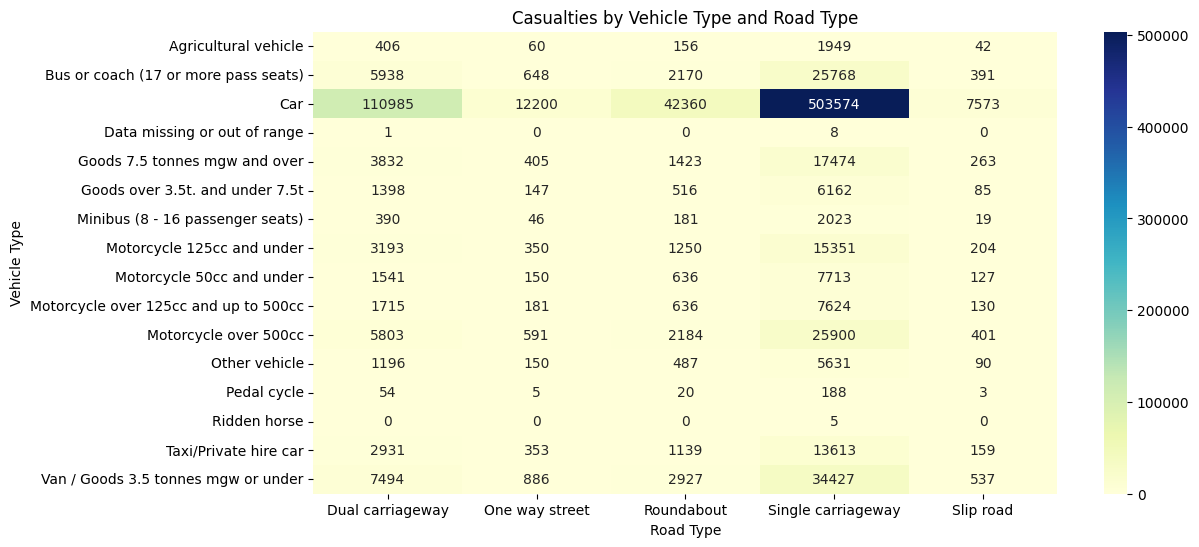

In [49]:
combined_df = combined.unstack(fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(combined_df, annot=True, fmt="d", cmap="YlGnBu")

plt.title("Casualties by Vehicle Type and Road Type")
plt.xlabel("Road Type")
plt.ylabel("Vehicle Type")
plt.show()

<h1>Insight:</h1>
<h3>Across all vehicle types, the highest number of casualties occurs on single carriageway roads. This suggests that single carriageways, likely due to their high traffic volume and mixed vehicle use, present a greater risk of accidents and casualties compared to other road types such as dual carriageways, roundabouts, or slip roads.</h3>
<hr>

<h1>Question 16</h1>
<hr>
<h3>Are accidents more frequent in low-visibility conditions?</h3>

In [50]:
accident['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

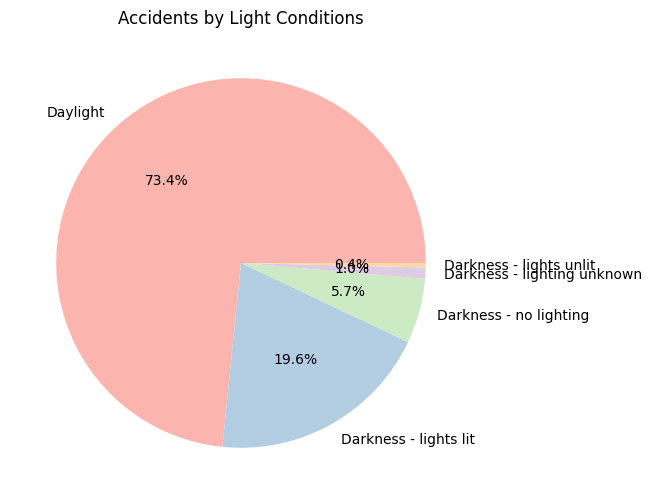

In [51]:
counts = accident['Light_Conditions'].value_counts()

plt.figure(figsize=(6,6))
counts.plot(kind="pie", autopct="%1.1f%%", colors=plt.cm.Pastel1.colors)
plt.ylabel("")
plt.title("Accidents by Light Conditions")
plt.show()

<h1>Insight:</h1>
<h3>Most accidents occur during daylight (484,880), which is likely due to higher traffic volumes during the day. While accidents also happen in dark conditions—especially when lights are on or absent—the overall frequency is lower, suggesting that exposure (number of vehicles on the road) is a key factor influencing accident occurrence.</h3>
<hr>

<h1>Question 17</h1>
<hr>
<h3>Are rural areas more likely to experience fatal accidents than urban areas?</h3>

In [52]:
rur = accident.groupby(['Urban_or_Rural_Area', 'Accident_Severity'])['Number_of_Casualties'].sum()
rur

Urban_or_Rural_Area  Accident_Severity
Rural                Fatal                 11733
                     Serious               62770
                     Slight               279012
Unallocated          Fatal                     0
                     Serious                   1
                     Slight                   12
Urban                Fatal                  4750
                     Serious               66668
                     Slight               471622
Name: Number_of_Casualties, dtype: int64

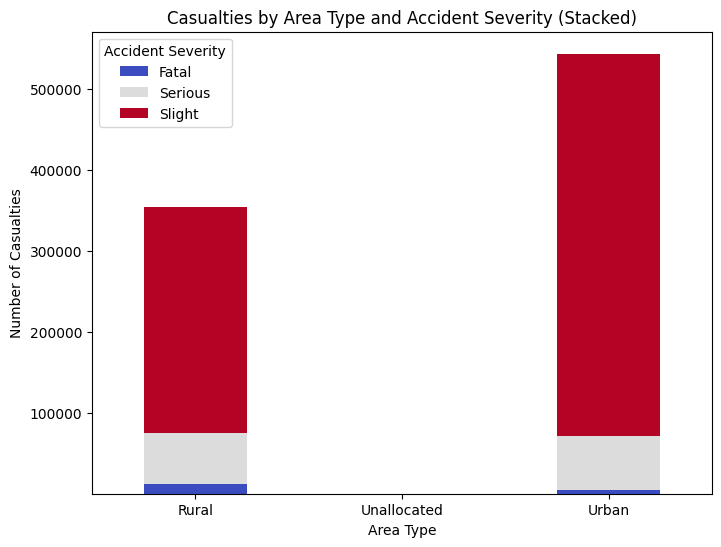

In [53]:
rur_df = rur.unstack(fill_value=0)

rur_df.plot(kind="bar", stacked=True, figsize=(8,6), colormap="coolwarm")

plt.title("Casualties by Area Type and Accident Severity (Stacked)")
plt.xlabel("Area Type")
plt.ylabel("Number of Casualties")
plt.legend(title="Accident Severity")
plt.xticks(rotation=0)
plt.show()

<h1>Insight:</h1>
<h3>While urban areas report the highest total number of accidents and slight casualties (471,622), rural areas actually experience more fatal accidents (11,733) compared to urban areas (4,750). This suggests that although cities have more accidents overall due to higher traffic volumes, rural accidents tend to be more severe, likely due to higher speeds, less immediate access to emergency services, and longer response times.</h3>
<hr>

<h1>Question 18</h1>
<hr>
<h3>Which Road surface conditions have the most number of casualties?</h3>

In [54]:
road_casualties = accident.groupby('Road_Surface_Conditions')['Number_of_Casualties'].sum()
road_casualties

Road_Surface_Conditions
Dry                     598606
Flood over 3cm. deep      1521
Frost or ice             24976
Snow                      8008
Wet or damp             263457
Name: Number_of_Casualties, dtype: int64

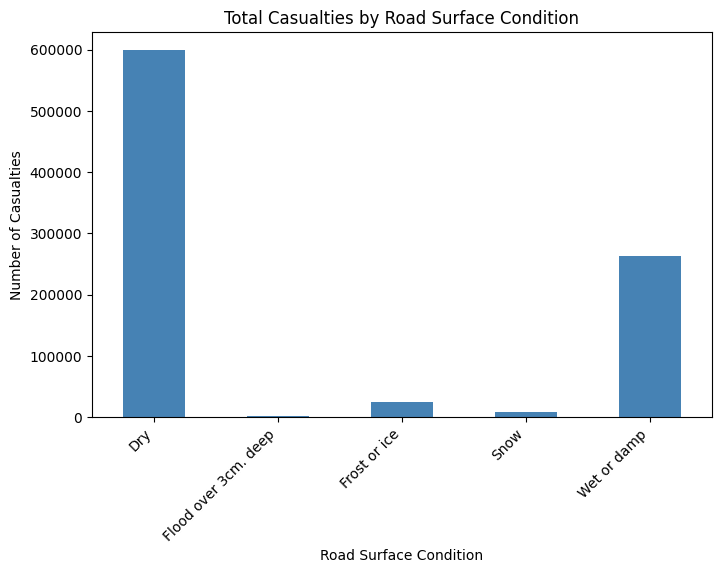

In [55]:
road_casualties.plot(kind="bar", color="steelblue", figsize=(8,5))

plt.title("Total Casualties by Road Surface Condition")
plt.xlabel("Road Surface Condition")
plt.ylabel("Number of Casualties")
plt.xticks(rotation=45, ha="right")
plt.show()

<h1>Insight:</h1>
<h3>Accidents on dry road surfaces account for the highest number of casualties (598,606), likely reflecting the fact that most traffic occurs under dry conditions. However, hazardous surfaces such as wet roads, frost, ice, and snow, while less frequent, still contribute substantially to serious and fatal accidents, highlighting the increased risk posed by adverse conditions.</h3>
<hr>

<h1>Question 19</h1>
<hr>
<h3>How do Weather conditions and Vehicle type together affect Number of casualties?</h3>

In [56]:
co = accident.groupby(['Weather_Conditions', 'Vehicle_Type'])['Number_of_Casualties'].size()
co

Weather_Conditions     Vehicle_Type                        
Fine + high winds      Agricultural vehicle                      20
                       Bus or coach (17 or more pass seats)     350
                       Car                                     6463
                       Data missing or out of range               1
                       Goods 7.5 tonnes mgw and over            251
                                                               ... 
Snowing no high winds  Other vehicle                             50
                       Pedal cycle                                3
                       Ridden horse                               0
                       Taxi/Private hire car                    136
                       Van / Goods 3.5 tonnes mgw or under      296
Name: Number_of_Casualties, Length: 128, dtype: int64

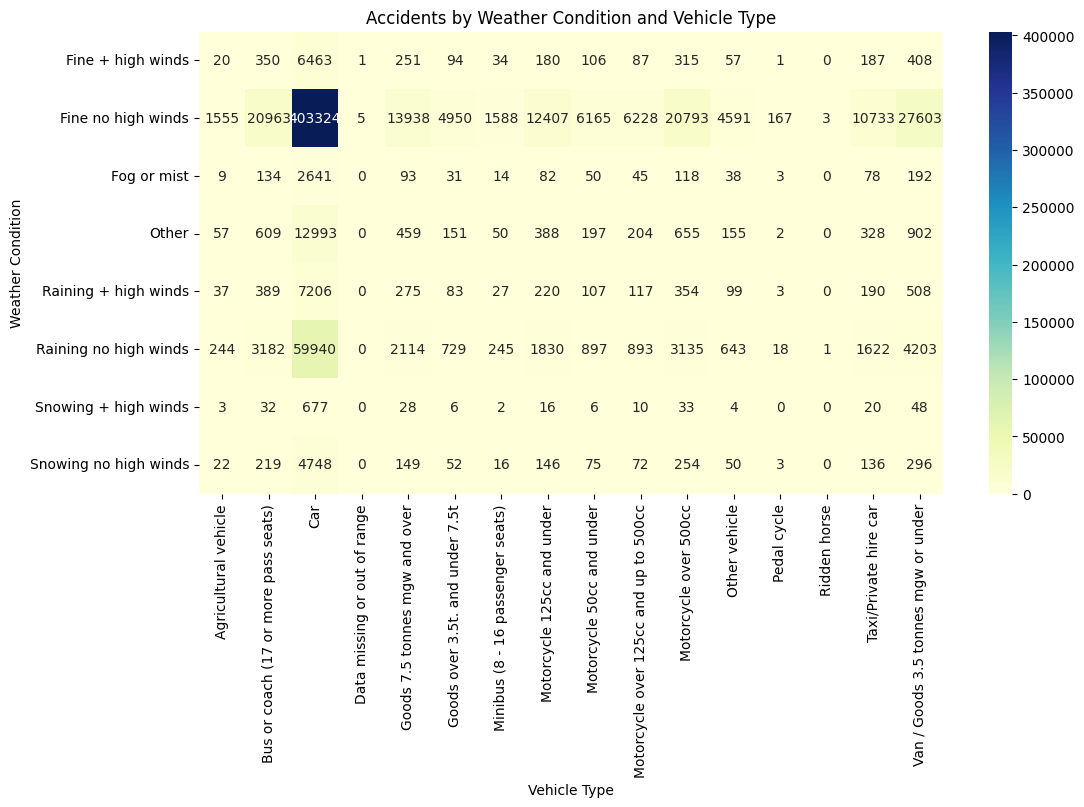

In [57]:
co_df = co.unstack(fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(co_df, annot=True, fmt="d", cmap="YlGnBu")

plt.title("Accidents by Weather Condition and Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Weather Condition")
plt.show()

<h1>Insight:</h1>
<h3>Casualties are highest for cars, particularly under fine weather with high winds, highlighting that both vehicle type and weather conditions influence accident outcomes. While cars contribute the most casualties overall due to their prevalence, other vehicles such as buses, vans, and goods vehicles also show significant numbers under certain weather conditions, indicating that risk varies by both vehicle type and environmental factors..</h3>
<hr>

<h1>Question 20</h1>
<hr>
<h3>Is there a relationship between Latitude/Longitude and Number of casualties</h3>

In [58]:
lat_corr = accident['Latitude'].corr(accident['Number_of_Casualties'])
lat_corr

np.float64(0.0322006866259064)

In [59]:
lon_corr = accident['Longitude'].corr(accident['Number_of_Casualties'])
lon_corr

np.float64(-0.040405645788454514)

<h1>Insight:</h1>
<h3>There is a very weak positive correlation between latitude and the number of casualties (0.032) and a very weak negative correlation with longitude (-0.040). This suggests that geographic location has a slight influence on accident severity, with accidents tending to be marginally more severe at higher latitudes and slightly less severe further east</h3>
<hr>

<h1>Question 21</h1>
<hr>
<h3>Are accidents more frequent in certain months of the year?</h3>

In [60]:
monthly_counts = accident['month'].value_counts().sort_index()
monthly_counts

month
1     52872
2     49491
3     54086
4     51744
5     56352
6     56481
7     57445
8     53913
9     56455
10    59580
11    60424
12    51836
Name: count, dtype: int64

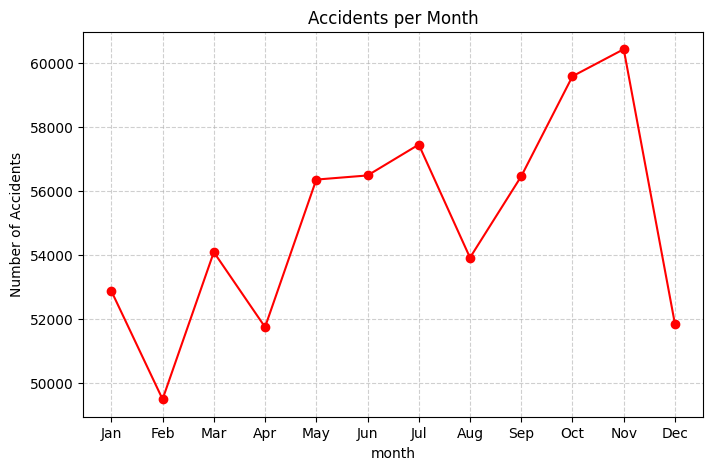

In [61]:
monthly_counts.plot(kind="line", marker="o", color="red", figsize=(8,5))

plt.title("Accidents per Month")
plt.xlabel("month")
plt.ylabel("Number of Accidents")
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

<h1>Insight:</h1>
<h3>Accidents occur throughout the year, but the highest number is recorded in November (60,424), followed closely by October (59,580) and July (57,445). This suggests that certain months may experience increased accident frequency, possibly due to seasonal factors such as weather conditions, holidays, or traffic patterns.</h3>
<hr>

<h1>Question 22</h1>
<hr>
<h3>Is there a difference in the average number of casualties between months?</h3>

In [62]:
avg_casualties = accident.groupby('month')['Number_of_Casualties'].mean()
avg_casualties

month
1     1.343585
2     1.343941
3     1.351107
4     1.364796
5     1.362791
6     1.350826
7     1.366350
8     1.396324
9     1.347144
10    1.347801
11    1.348024
12    1.362972
Name: Number_of_Casualties, dtype: float64

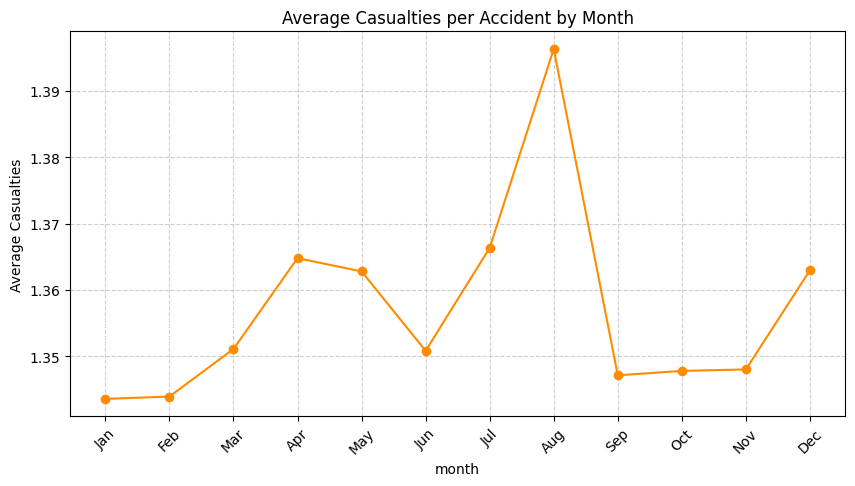

In [63]:
avg_casualties.plot(kind="line", marker="o", color="darkorange", figsize=(10,5))

plt.title("Average Casualties per Accident by Month")
plt.xlabel("month")
plt.ylabel("Average Casualties")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation = 45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

<h1>Insight:</h1>
<h3>The average number of casualties per accident is fairly consistent across all months, ranging roughly between 1.34 and 1.40, with only slight differences.</h3>
<hr>

<h1>Question 23</h1>
<hr>
<h3>Is there a trend of accidents increasing or decreasing year by year?</h3>

In [64]:
yearly_counts = accident['year'].value_counts().sort_index()
yearly_counts

year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

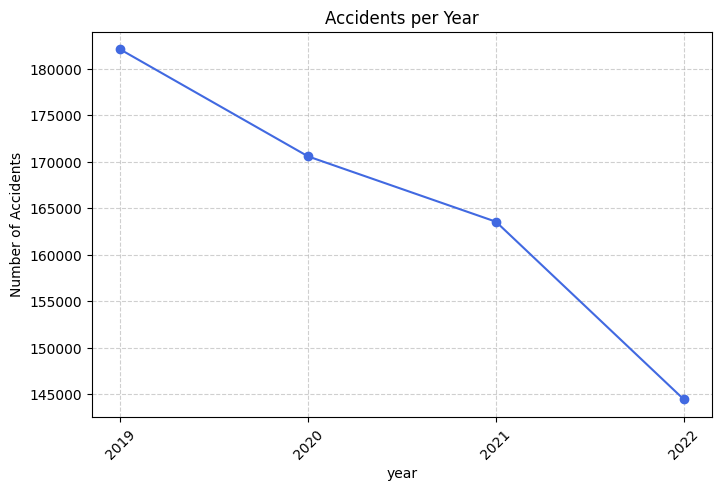

In [65]:
accident['year'] = accident['year'].astype(int)
yearly_counts = accident['year'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.plot(yearly_counts.index, yearly_counts.values, marker="o", color="royalblue")

plt.title("Accidents per Year")
plt.xlabel("year")
plt.ylabel("Number of Accidents")
plt.xticks(yearly_counts.index, rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

<h1>Insight:</h1>
<h3>The total number of accidents has steadily decreased from 182,115 in 2019 to 144,419 in 2022. This downward trend may reflect improvements in road safety measures, traffic management, public awareness campaigns, or changes in traffic volume over the years.</h3>
<hr>

<h1>Question 24</h1>
<hr>
<h3>Are accidents more frequent on weekdays or weekends?</h3>

In [66]:
week_counts = accident['dayofweek'].value_counts()
week_counts

dayofweek
5    107178
2     99558
3     99511
4     97900
1     94550
6     89302
0     72680
Name: count, dtype: int64

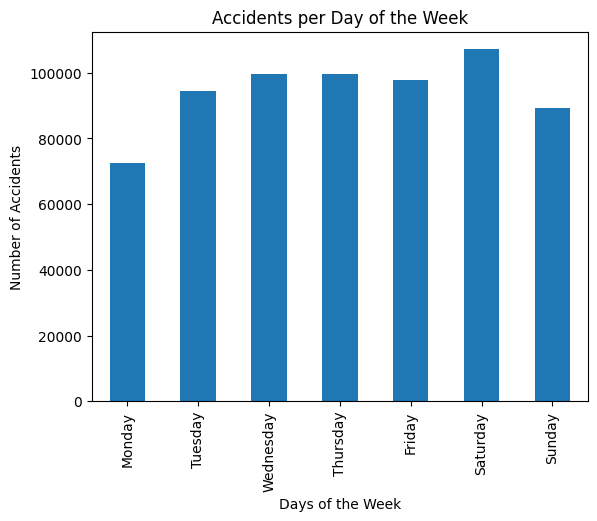

In [67]:
day_names = {
    0: 'Monday',
    1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}

accidents_day = accident['dayofweek'].value_counts().sort_index()
accidents_day.index = accidents_day.index.map(day_names)
accidents_day.plot(kind='bar')
plt.title('Accidents per Day of the Week')
plt.xlabel('Days of the Week')
plt.ylabel('Number of Accidents')
plt.show()

<h1>Insight:</h1>
<h3>Accidents peak on Saturdays (107,178), while Sundays (89,302) and other weekdays report lower numbers. This indicates that accident frequency tends to be higher during weekends, possibly due to increased leisure travel, social activities, or changes in traffic patterns compared to weekdays.</h3>
<hr>

<h1>Question 25</h1>
<hr>
<h3>Do certain days of the month experience higher accident counts than others?</h3>

In [68]:
day_counts = accident.groupby('day').size().sort_values(ascending=False)
day_counts

day
1     22606
12    22536
11    22503
5     22409
10    22328
9     22252
17    22117
23    21997
6     21974
16    21972
19    21956
8     21914
20    21838
15    21818
13    21816
2     21815
18    21719
4     21699
21    21641
22    21634
3     21540
14    21474
7     21431
24    21301
26    21168
27    21038
28    20707
29    20138
25    19949
30    19573
31    11816
dtype: int64

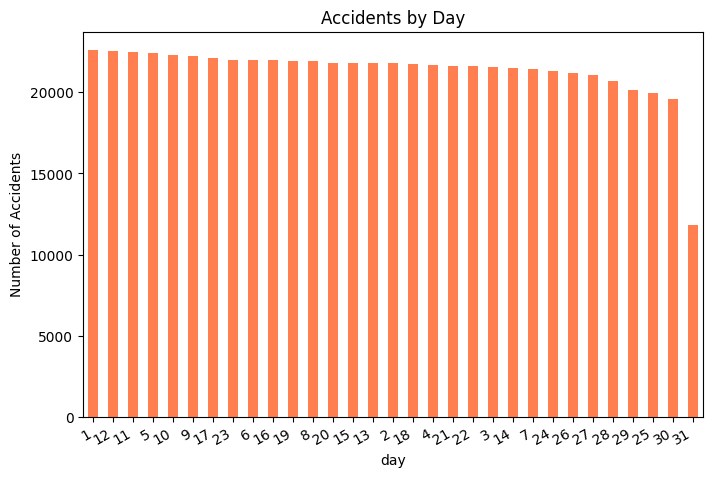

In [69]:
day_counts.plot(kind="bar", color="coral", figsize=(8,5))
plt.title("Accidents by Day")
plt.xlabel("day")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=30, ha="right")
plt.show()

<h1>Insight:</h1>
<h3>Accident frequency varies across the days of the month, with the highest counts occurring on the 1st (22,606), 12th (22,536), and 11th (22,503), while the lowest is on the 31st (11,816). This suggests that certain days consistently experience more accidents, indicating temporal patterns that could be influenced by traffic volume, weekdays versus weekends, or specific monthly events</h3>
<hr>

<h1>Using District Area and Heatmap</h1>

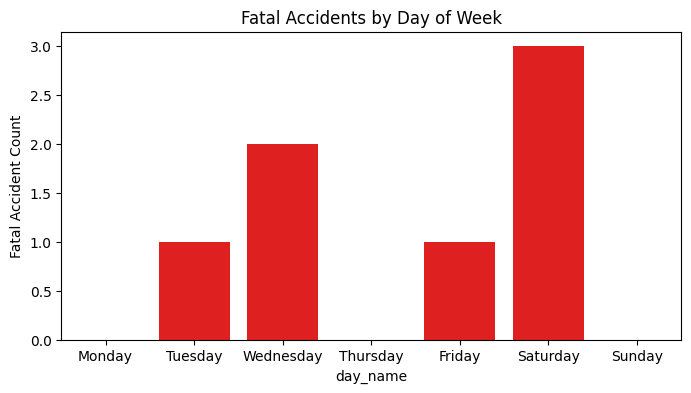

In [70]:
# Filter London data
London = accident[accident["District Area"] == 'City of London']

London_F= London[London["Accident_Severity"] == "Fatal"]

order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(8,4))
sns.countplot(data=London_F, x="day_name", order=order, color="red")
plt.title("Fatal Accidents by Day of Week")
plt.ylabel("Fatal Accident Count")
plt.show()

# Folium Heatmap
coords = London[["Latitude","Longitude"]].dropna()
m = folium.Map(location=[coords["Latitude"].mean(), coords["Longitude"].mean()], zoom_start=11)
HeatMap(coords.values.tolist(), radius=8).add_to(m)

# Save HTML for GitHub link
# m.save("birmingham_heatmap.html")

# 1️⃣ Inline map (works in Jupyter, not GitHub)
# IFrame("html_maps/birmingham_heatmap.html", width=800, height=500)


<img src="images/london.png" width="800">

<h1>London HeatMap Insight:</h1>
<h2>Insight 1</h2>
<h4>Most accidents tend to happen at intersections, making them one of the riskiest spots on the road. The mix of vehicles, pedestrians, and cyclists crossing paths creates more chances for conflict compared to straight roads.</h4>

<h2>Insight 2</h2>
<h4>Pedestrians and cyclists are at greater risk in these areas because they are exposed and have less protection than those inside vehicles. This makes accidents at intersections more dangerous for vulnerable road users.</h4>

<h2>Insight 3</h2>
<h4>Intersections should be improved through clearer traffic signals, better road markings, or designs that slow vehicles down. Stricter enforcement of traffic rules and stronger awareness campaigns can also make intersections safer for everyone.</h4>

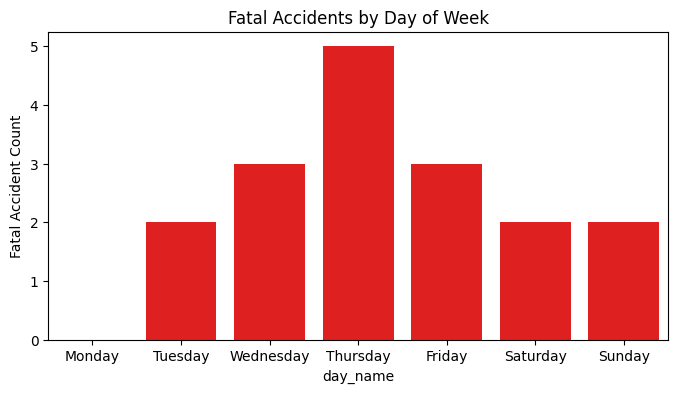

In [71]:
# Filter Kensington and Chelsea data
kc = accident[accident["District Area"] == 'Kensington and Chelsea']

kc_F= kc[kc["Accident_Severity"] == "Fatal"]

order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(8,4))
sns.countplot(data=kc_F, x="day_name", order=order, color="red")
plt.title("Fatal Accidents by Day of Week")
plt.ylabel("Fatal Accident Count")
plt.show()

# Folium Heatmap
# coords = birmingham[["Latitude","Longitude"]].dropna()
# m = folium.Map(location=[coords["Latitude"].mean(), coords["Longitude"].mean()], zoom_start=11)
# HeatMap(coords.values.tolist(), radius=8).add_to(m)

# Save HTML for GitHub link
# m.save("birmingham_heatmap.html")

# 1️⃣ Inline map (works in Jupyter, not GitHub)
# IFrame("html_maps/birmingham_heatmap.html", width=800, height=500)

<img src="images/KC.png" width="800">

<h1>Kensington and Chelsea HeatMap Insight:</h1>
<h2>Insight 1</h2>
<h4>Many accidents are concentrated along Cromwell Road, which clearly marks it as a high-risk location in the city. The heavy traffic flow on this road, combined with frequent intersections and pedestrian activity, creates constant opportunities for conflict between vehicles and people.</h4>

<h2>Insight 2</h2>
<h4>Cromwell Road also carries the pressure of being a major route, which means drivers are often rushing, overtaking, or becoming impatient in congested conditions. These factors, along with possible issues like unclear road markings or poorly timed traffic lights, increase the chances of mistakes that lead to collisions.</h4>

<h2>Insight 3</h2>
<h4>This pattern suggests that improving road safety on Cromwell Road should be a priority. Stricter speed control, clearer pedestrian crossings, and better traffic management could significantly reduce accident numbers and make the road safer for both drivers and pedestrians.</h4>

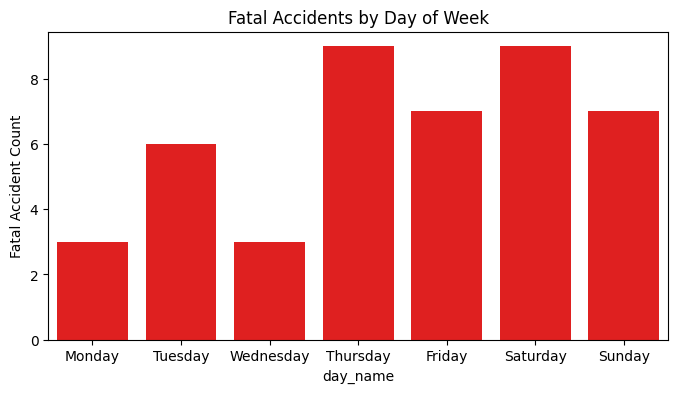

In [72]:
# Filter Westminster data
Westminster = accident[accident["District Area"] == 'Westminster']

Westminster_F= Westminster[Westminster["Accident_Severity"] == "Fatal"]

order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(8,4))
sns.countplot(data=Westminster_F, x="day_name", order=order, color="red")
plt.title("Fatal Accidents by Day of Week")
plt.ylabel("Fatal Accident Count")
plt.show()

# Folium Heatmap
# coords = birmingham[["Latitude","Longitude"]].dropna()
# m = folium.Map(location=[coords["Latitude"].mean(), coords["Longitude"].mean()], zoom_start=11)
# HeatMap(coords.values.tolist(), radius=8).add_to(m)

# Save HTML for GitHub link
# m.save("birmingham_heatmap.html")

# 1️⃣ Inline map (works in Jupyter, not GitHub)
# IFrame("html_maps/birmingham_heatmap.html", width=800, height=500)

<img src="images/westminster.png" width="800">

<h1>Westminster HeatMap Insight:</h1>
<h2>Insight 1</h2>
<h4>Marylebone Road experiences a significant number of accidents, largely because it serves as one of London’s busiest east–west routes. It carries a heavy mix of local and through traffic, including buses, lorries, and cars, which increases congestion and the risk of collisions. The constant stop-and-go flow, especially near intersections and junctions, creates conditions where minor crashes and more serious accidents can occur.</h4>

<h2>Insight 2</h2>
<h4>The presence of traffic lights and pedestrian crossings on Marylebone Road does not automatically prevent accidents. Heavy traffic flow and the constant pressure on drivers often lead to risky decisions, such as running late yellows or accelerating aggressively once the lights change.</h4>

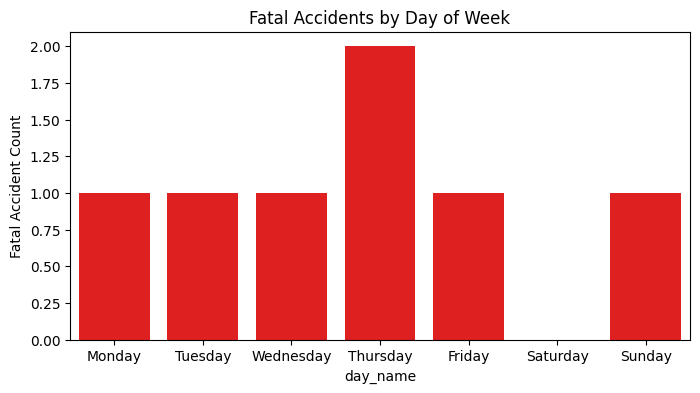

In [73]:
# Filter Richmond upon Thames data
Richmond = accident[accident["District Area"] == 'Richmond upon Thames']

Richmond_F= Richmond[Richmond["Accident_Severity"] == "Fatal"]

order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(8,4))
sns.countplot(data=Richmond_F, x="day_name", order=order, color="red")
plt.title("Fatal Accidents by Day of Week")
plt.ylabel("Fatal Accident Count")
plt.show()

# Folium Heatmap
# coords = birmingham[["Latitude","Longitude"]].dropna()
# m = folium.Map(location=[coords["Latitude"].mean(), coords["Longitude"].mean()], zoom_start=11)
# HeatMap(coords.values.tolist(), radius=8).add_to(m)

# Save HTML for GitHub link
# m.save("birmingham_heatmap.html")

# 1️⃣ Inline map (works in Jupyter, not GitHub)
# IFrame("html_maps/birmingham_heatmap.html", width=800, height=500)

<img src="images/richmond.png" width="800">

<h1>Richmond upon Thames HeatMap Insight:</h1>
<h2>Insight 1</h2>
<h4>Intersections naturally bring together vehicles from different directions, which increases the number of potential conflict points. Even with signals and signs, the sheer volume of decisions drivers must make in a short span, when to turn, when to yield, how fast to go, creates a higher chance of mistakes.</h4>

<h2>Insight 2</h2>
<h4>Many accidents happen when drivers try to “beat the light” or misjudge another vehicle’s speed when turning. This behavior is amplified in busy intersections where pressure builds during congestion, leading to rushed or risky maneuvers.</h4>

<h2>Insight 3</h2>
<h4>Intersections, by design, concentrate risk. They need more than just signals, they require well-timed lights, clear markings, and physical features that slow drivers down and guide pedestrians safely across.</h4>

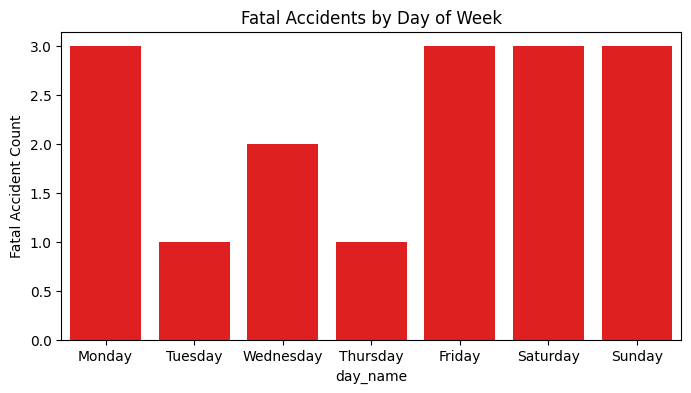

In [74]:
# Filter Central Bedfordshire data
centralB = accident[accident["District Area"] == 'Central Bedfordshire']

centralB_F= centralB[centralB["Accident_Severity"] == "Fatal"]

order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(8,4))
sns.countplot(data=centralB_F, x="day_name", order=order, color="red")
plt.title("Fatal Accidents by Day of Week")
plt.ylabel("Fatal Accident Count")
plt.show()

# Folium Heatmap
# coords = birmingham[["Latitude","Longitude"]].dropna()
# m = folium.Map(location=[coords["Latitude"].mean(), coords["Longitude"].mean()], zoom_start=11)
# HeatMap(coords.values.tolist(), radius=8).add_to(m)

# Save HTML for GitHub link
# m.save("birmingham_heatmap.html")

# 1️⃣ Inline map (works in Jupyter, not GitHub)
# IFrame("html_maps/birmingham_heatmap.html", width=800, height=500)

<img src="images/centralB.png" width="800">

<h1>Central Bedfordshire HeatMap Insight:</h1>
<h2>Insight 1</h2>
<h4>The central part of the district carries the highest concentration of accidents. This density means more interactions and, in turn, more opportunities for mistakes or conflicts that leads to accidents.</h4>

<h2>Insight 2</h2>
<h4>The road networks in central areas are often more complex, with multiple lanes, bus stops, and side streets feeding into main roads. This complexity creates confusion, especially for drivers unfamiliar with the area, leading to sudden stops or lane changes.</h4>

<h2>Insight 3</h2>
<h4>The central of a district concentrate both traffic volume and human activity, making them natural hotspots for accidents. Improving traffic management, enhancing pedestrian safety features, and enforcing strict compliance can help reduce these risks.</h4>

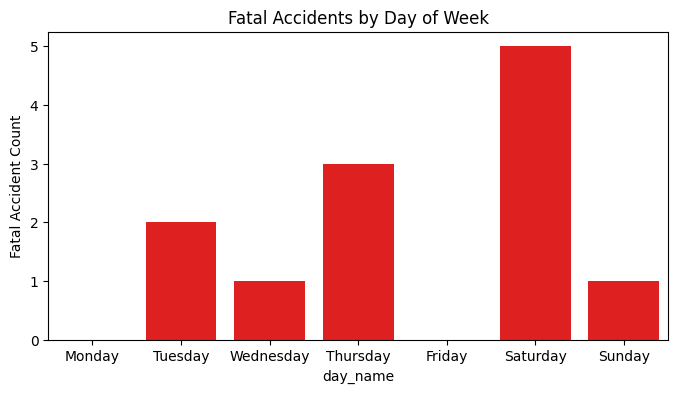

In [76]:
# Filter Aberdeen City data
Aberdeen = accident[accident["District Area"] == 'Aberdeen City']

Aberdeen_F= Aberdeen[Aberdeen["Accident_Severity"] == "Fatal"]

order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(8,4))
sns.countplot(data=Aberdeen_F, x="day_name", order=order, color="red")
plt.title("Fatal Accidents by Day of Week")
plt.ylabel("Fatal Accident Count")
plt.show()

# Folium Heatmap
# coords = birmingham[["Latitude","Longitude"]].dropna()
# m = folium.Map(location=[coords["Latitude"].mean(), coords["Longitude"].mean()], zoom_start=11)
# HeatMap(coords.values.tolist(), radius=8).add_to(m)

# Save HTML for GitHub link
# m.save("birmingham_heatmap.html")

# 1️⃣ Inline map (works in Jupyter, not GitHub)
# IFrame("html_maps/birmingham_heatmap.html", width=800, height=500)

<img src="images/aberdeen.png" width="800">

<h1>Aberdeen City HeatMap Insight:</h1>
<h2>Insight 1</h2>
<h4>Aberdeen City, being a busy urban center, has a relatively dense population compared to surrounding areas. This means more vehicles and pedestrians are concentrated within the same road network, naturally increasing the risk of accidents.</h4>

<h2>Insight 2</h2>
<h4>The city attracts not only residents but also commuters, students, and tourists. This constant flow of people adds pressure to the roads, especially during peak hours, when both drivers and pedestrians compete for limited space.</h4>

<h2>Insight 3</h2>
<h4>Aberdeen’s population density directly contributes to its higher accident rates. Without improved traffic control, safer pedestrian pathways, and better public awareness, the pressure from the growing population will continue to cause risks on the road.</h4>